In [124]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = 12, 6

In [125]:
pd.options.mode.chained_assignment = None  # Suppress SettingWithCopyWarning

In [126]:
# loading dataset
df = pd.read_csv("Crime_Data_from_2020_to_Present.csv")

In [127]:
df

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,200110444,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
807372,231604807,01/27/2023 12:00:00 AM,01/26/2023 12:00:00 AM,1800,16,Foothill,1663,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,12500 BRANFORD ST,NaN,34.2466,-118.4054
807373,231606525,03/22/2023 12:00:00 AM,03/22/2023 12:00:00 AM,1000,16,Foothill,1602,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,IC,Invest Cont,230.0,NaN,NaN,NaN,12800 FILMORE ST,NaN,34.2790,-118.4116
807374,231210064,04/12/2023 12:00:00 AM,04/12/2023 12:00:00 AM,1630,12,77th Street,1239,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,IC,Invest Cont,230.0,NaN,NaN,NaN,6100 S VERMONT AV,NaN,33.9841,-118.2915
807375,230115220,07/02/2023 12:00:00 AM,07/01/2023 12:00:00 AM,1,1,Central,154,1,352,PICKPOCKET,...,IC,Invest Cont,352.0,NaN,NaN,NaN,500 S MAIN ST,NaN,34.0467,-118.2485


## EDA

In [128]:
# Convert column to datetime format with a specific format
df['DATE OCC'] = pd.to_datetime(df['DATE OCC'])


In [129]:
df['dayofweek'] = df['DATE OCC'].dt.dayofweek  # add dow column
df['day'] = df['DATE OCC'].dt.day
df['month'] = df['DATE OCC'].dt.month

df[['DATE OCC','dayofweek','day','month']].head()


,DATE OCC,dayofweek,day,month
0,2020-01-08,2,8,1
1,2020-01-01,2,1,1
2,2020-02-13,3,13,2
3,2020-01-01,2,1,1
4,2020-01-01,2,1,1


## taking only the los angles data based on lat and lon

In [130]:


df_clean = df[(df.LON!=0) | (df.LAT!=0)]

In [131]:
df_clean[['LAT','LON']].head(20)

,LAT,LON
0,34.0141,-118.2978
1,34.0459,-118.2545
2,34.0448,-118.2474
3,34.1685,-118.4019
4,34.2198,-118.4468
5,34.0452,-118.2534
6,34.0483,-118.2631
7,34.0448,-118.2474
8,34.0677,-118.2398
9,34.2864,-118.5021


In [132]:
df_clean[['LAT','LON']].tail(20)

,LAT,LON
807357,34.2011,-118.5884
807358,34.1038,-118.3020
807359,34.0808,-118.1738
807360,34.1660,-118.3705
807361,34.1866,-118.5582
807362,33.9846,-118.4428
807363,34.1038,-118.3151
807364,34.0499,-118.3762
807365,34.2162,-118.3882
807366,34.1837,-118.4465


In [133]:
filtered_df = df_clean[(df_clean['LAT'] > 34.0)]
print(filtered_df[['LAT', 'LON']])

            LAT       LON
0       34.0141 -118.2978
1       34.0459 -118.2545
2       34.0448 -118.2474
3       34.1685 -118.4019
4       34.2198 -118.4468
...         ...       ...
807371  34.1381 -118.2115
807372  34.2466 -118.4054
807373  34.2790 -118.4116
807375  34.0467 -118.2485
807376  34.1951 -118.4487

[632997 rows x 2 columns]


In [134]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 632997 entries, 0 to 807376
Data columns (total 31 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DR_NO           632997 non-null  int64         
 1   Date Rptd       632997 non-null  object        
 2   DATE OCC        632997 non-null  datetime64[ns]
 3   TIME OCC        632997 non-null  int64         
 4   AREA            632997 non-null  int64         
 5   AREA NAME       632997 non-null  object        
 6   Rpt Dist No     632997 non-null  int64         
 7   Part 1-2        632997 non-null  int64         
 8   Crm Cd          632997 non-null  int64         
 9   Crm Cd Desc     632997 non-null  object        
 10  Mocodes         549641 non-null  object        
 11  Vict Age        632997 non-null  int64         
 12  Vict Sex        553689 non-null  object        
 13  Vict Descent    553684 non-null  object        
 14  Premis Cd       632990 non-null  flo

In [135]:
df_num = filtered_df.select_dtypes(include = "number")
df_num = df_num.fillna(0)

In [136]:
df_num

,DR_NO,TIME OCC,AREA,Rpt Dist No,Part 1-2,Crm Cd,Vict Age,Premis Cd,Weapon Used Cd,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LAT,LON,dayofweek,day,month
0,10304468,2230,3,377,2,624,36,501.0,400.0,624.0,0.0,0.0,0.0,34.0141,-118.2978,2,8,1
1,190101086,330,1,163,2,624,25,102.0,500.0,624.0,0.0,0.0,0.0,34.0459,-118.2545,2,1,1
2,200110444,1200,1,155,2,845,0,726.0,0.0,845.0,0.0,0.0,0.0,34.0448,-118.2474,3,13,2
3,191501505,1730,15,1543,2,745,76,502.0,0.0,745.0,998.0,0.0,0.0,34.1685,-118.4019,2,1,1
4,191921269,415,19,1998,2,740,31,409.0,0.0,740.0,0.0,0.0,0.0,34.2198,-118.4468,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
807371,231110961,1200,11,1115,2,745,47,704.0,0.0,745.0,0.0,0.0,0.0,34.1381,-118.2115,3,6,7
807372,231604807,1800,16,1663,2,740,23,122.0,0.0,740.0,0.0,0.0,0.0,34.2466,-118.4054,3,26,1
807373,231606525,1000,16,1602,1,230,25,102.0,400.0,230.0,0.0,0.0,0.0,34.2790,-118.4116,2,22,3
807375,230115220,1,1,154,1,352,24,735.0,0.0,352.0,0.0,0.0,0.0,34.0467,-118.2485,5,1,7


In [137]:
# #FEATURE IMPORTANCE BEFORE ENCODING USING ONLY THE NUMERICAL VALUES 
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_absolute_error
# from sklearn.ensemble import RandomForestClassifier
# from rfpimp import *

# X = df_num.drop('AREA',axis = 1)
# y = df_num['AREA']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 

# rf = RandomForestClassifier(n_estimators=100)
# rf.fit(X_train, y_train)
# I = importances(rf, X_test, y_test)
# I

In [138]:
# #FEATURE IMPORTANCE BEFORE ENCODING USING ONLY THE NUMERICAL VALUES 
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_absolute_error
# from sklearn.ensemble import RandomForestRegressor
# from rfpimp import *

# X = df_num.drop('AREA',axis = 1)
# y = df_num['AREA']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 

# rf = RandomForestRegressor(n_estimators=100)
# rf.fit(X_train, y_train)
# I = importances(rf, X_test, y_test)
# I

In [139]:
# from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.model_selection import train_test_split
# from rfpimp import *

# # Assuming df_num contains only numerical features and 'AREA' is the target column
# X = df_num.drop('AREA', axis=1)
# y = df_num['AREA']

# # Split the data into training and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Initialize and train Gradient Boosting model
# gbm = GradientBoostingClassifier(n_estimators=100)
# gbm.fit(X_train, y_train)

# # Calculate feature importances
# I = importances(gbm, X_test, y_test)
# print(I)


In [140]:
filtered_df.shape

(632997, 31)

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 807377 entries, 0 to 807376
Data columns (total 31 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DR_NO           807377 non-null  int64         
 1   Date Rptd       807377 non-null  object        
 2   DATE OCC        807377 non-null  datetime64[ns]
 3   TIME OCC        807377 non-null  int64         
 4   AREA            807377 non-null  int64         
 5   AREA NAME       807377 non-null  object        
 6   Rpt Dist No     807377 non-null  int64         
 7   Part 1-2        807377 non-null  int64         
 8   Crm Cd          807377 non-null  int64         
 9   Crm Cd Desc     807377 non-null  object        
 10  Mocodes         696010 non-null  object        
 11  Vict Age        807377 non-null  int64         
 12  Vict Sex        701468 non-null  object        
 13  Vict Descent    701460 non-null  object        
 14  Premis Cd       807368 non-null  flo

In [142]:
## AREA,Crm cd, Vict Age, Vict Sex, Vict Descent, Premis Cd, Status

In [143]:
crime=filtered_df[['AREA','Vict Age','Vict Sex','Vict Descent','Crm Cd','Premis Cd','Status','dayofweek','day','month']]
crime.head(20)

,AREA,Vict Age,Vict Sex,Vict Descent,Crm Cd,Premis Cd,Status,dayofweek,day,month
0,3,36,F,B,624,501.0,AO,2,8,1
1,1,25,M,H,624,102.0,IC,2,1,1
2,1,0,X,X,845,726.0,AA,3,13,2
3,15,76,F,W,745,502.0,IC,2,1,1
4,19,31,X,X,740,409.0,IC,2,1,1
5,1,25,F,H,121,735.0,IC,2,1,1
6,1,23,M,H,442,404.0,IC,3,2,1
7,1,0,X,X,946,726.0,IC,5,4,1
8,1,23,M,B,341,502.0,IC,5,4,1
9,17,0,X,X,341,203.0,AO,1,26,5


In [144]:
#checking the missing value in crime dataframe
crime.isnull().sum()

AREA                0
Vict Age            0
Vict Sex        79308
Vict Descent    79313
Crm Cd              0
Premis Cd           7
Status              0
dayofweek           0
day                 0
month               0
dtype: int64

In [145]:
def sniff(df):
    with pd.option_context("display.max_colwidth", 20):
        info = pd.DataFrame()
        info['sample'] = df.iloc[0]
        info['data type'] = df.dtypes
        info['percent missing'] = df.isnull().sum()*100/len(df)
        return info.sort_values('data type')

In [146]:
sniff(crime)

,sample,data type,percent missing
AREA,3,int64,0.000000
Vict Age,36,int64,0.000000
Crm Cd,624,int64,0.000000
dayofweek,2,int64,0.000000
day,8,int64,0.000000
month,1,int64,0.000000
Premis Cd,501.0,float64,0.001106
Vict Sex,F,object,12.528969
Vict Descent,B,object,12.529759
Status,AO,object,0.000000


## CLEANING

In [147]:
#crime['AREA'] = crime['AREA'].astype(str)


In [148]:
crime['Premis Cd'].unique()

array([501., 102., 726., 502., 409., 735., 404., 203., 101., 108., 503.,
       252., 103., 507., 148., 707., 801., 510., 401., 122., 406., 514.,
       900., 210., 902., 403., 725., 516., 123., 701., 402., 834., 517.,
       207., 151., 753., 710., 248., 405., 602., 931., 116., 741., 118.,
       719., 903., 202., 244., 744., 802., 504., 124., 917., 201., 733.,
       738., 706., 916., 901., 152., 727., 212., 109., 717., 508., 121.,
       119., 966., 218., 104., 810., 220., 413., 835., 301., 221., 722.,
       713., 222., 702., 506., 703., 940., 757., 811., 754., 715., 113.,
       106., 728., 235., 135., 114., 111., 720., 708., 906., 904., 216.,
       723., 138., 110., 704., 721., 907., 243., 156., 750., 729., 217.,
       120., 242., 255., 145., 509., 515., 505., 946., 408., 232., 251.,
       947., 949., 237., 518., 231., 247., 943., 712., 945., 944., 605.,
       213., 968., 238., 254., 229., 411., 146., 868., 127., 249., 809.,
       412., 417., 415., 418., 709., 752., 732., 73

In [149]:
crime['Vict Age'].unique()

array([ 36,  25,   0,  76,  31,  23,  29,  35,  41,  24,  34,  46,  66,
        40,  27,  62,  43,  71,  50,  19,  51,  33,  69,  39,  57,  78,
        52,  38,  55,  44,  18,  54,  22,  28,  42,  56,  67,  37,  60,
        61,  59,  32,  30,  45,  20,  58,  47,  48,  26,  21,  64,  75,
        12,  49,  68,  14,  13,  53,  74,  65,  16,  72,  63,  70,   9,
        15,  17,  90,  85,  81,  79,  94,  73,  80,   5,  11,  82,   2,
        77,  84,  88,  96,  99,  86,   7,  10,  92,   3,  83,  87,   6,
        -1,   8,  89,   4,  93,  98,  91,  95,  -2,  97, 120,  -3],
      dtype=int64)

In [150]:
crime.dropna(subset=['Vict Descent', 'Vict Sex', 'Premis Cd'],inplace=True)

In [151]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 553680 entries, 0 to 807376
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   AREA          553680 non-null  int64  
 1   Vict Age      553680 non-null  int64  
 2   Vict Sex      553680 non-null  object 
 3   Vict Descent  553680 non-null  object 
 4   Crm Cd        553680 non-null  int64  
 5   Premis Cd     553680 non-null  float64
 6   Status        553680 non-null  object 
 7   dayofweek     553680 non-null  int64  
 8   day           553680 non-null  int64  
 9   month         553680 non-null  int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 46.5+ MB


In [152]:
crime['Premis Cd'] = crime['Premis Cd'].astype('int64')

In [153]:
crime

,AREA,Vict Age,Vict Sex,Vict Descent,Crm Cd,Premis Cd,Status,dayofweek,day,month
0,3,36,F,B,624,501,AO,2,8,1
1,1,25,M,H,624,102,IC,2,1,1
2,1,0,X,X,845,726,AA,3,13,2
3,15,76,F,W,745,502,IC,2,1,1
4,19,31,X,X,740,409,IC,2,1,1
...,...,...,...,...,...,...,...,...,...,...
807371,11,47,M,F,745,704,IC,3,6,7
807372,16,23,M,H,740,122,IC,3,26,1
807373,16,25,F,H,230,102,IC,2,22,3
807375,1,24,F,H,352,735,IC,5,1,7


In [154]:
crime['Status'].nunique()

6

In [155]:
crime.describe()

,AREA,Vict Age,Crm Cd,Premis Cd,dayofweek,day,month
count,553680.000000,553680.000000,553680.000000,553680.00000,553680.000000,553680.000000,553680.000000
mean,10.161998,34.457959,500.462711,335.45458,3.018384,15.300852,6.192454
std,6.405730,19.812435,219.919533,217.13307,1.987820,8.950332,3.344553
min,1.000000,-3.000000,110.000000,101.00000,0.000000,1.000000,1.000000
25%,4.000000,24.000000,330.000000,108.00000,1.000000,7.000000,3.000000
50%,9.000000,34.000000,440.000000,402.00000,3.000000,15.000000,6.000000
75%,16.000000,48.000000,649.000000,502.00000,5.000000,23.000000,9.000000
max,21.000000,99.000000,956.000000,976.00000,6.000000,31.000000,12.000000


In [156]:
crime = crime[crime['Vict Age'] >= 1]
crime = crime[crime['Vict Sex'] != 'H']

In [157]:
crime.describe()

,AREA,Vict Age,Crm Cd,Premis Cd,dayofweek,day,month
count,480452.000000,480452.000000,480452.000000,480452.000000,480452.000000,480452.000000,480452.000000
mean,10.191089,39.704360,499.413665,336.429416,3.023894,15.226845,6.198648
std,6.463783,15.620404,220.021593,218.331297,1.990703,8.956629,3.350257
min,1.000000,2.000000,110.000000,101.000000,0.000000,1.000000,1.000000
25%,4.000000,28.000000,330.000000,104.000000,1.000000,7.000000,3.000000
50%,9.000000,37.000000,440.000000,404.000000,3.000000,15.000000,6.000000
75%,16.000000,50.000000,626.000000,502.000000,5.000000,23.000000,9.000000
max,21.000000,99.000000,956.000000,976.000000,6.000000,31.000000,12.000000


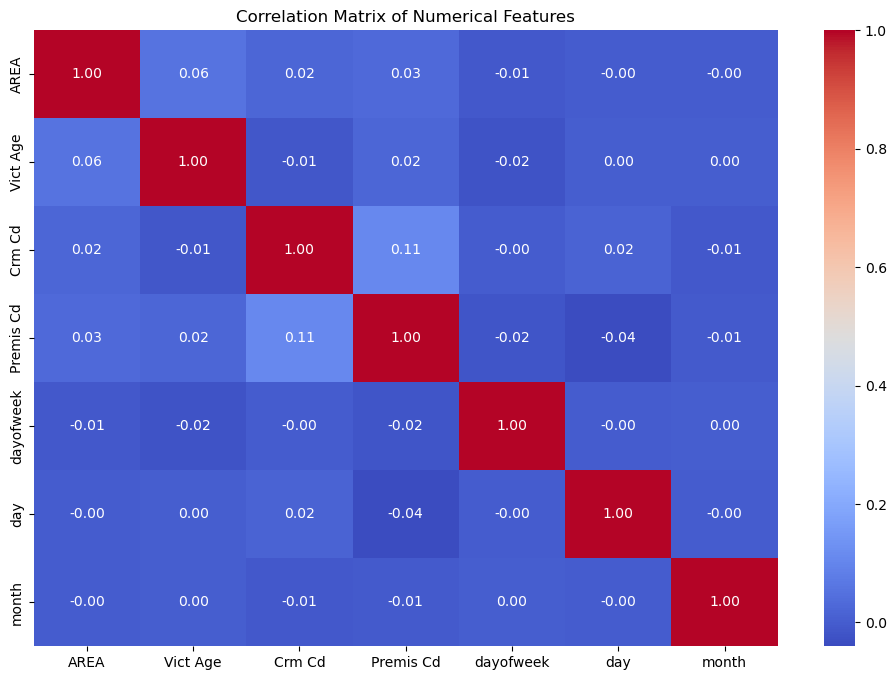

In [158]:
numerical_features = crime.select_dtypes(include='number')

# Construct the correlation matrix
correlation_matrix = numerical_features.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numerical Features")
plt.show()

In [159]:
crime['Vict Descent'].unique()

array(['B', 'H', 'W', 'X', 'A', 'O', 'C', 'F', 'K', 'I', 'V', 'Z', 'J',
       'P', 'G', 'U', 'D', 'S', 'L', '-'], dtype=object)

In [160]:
crime = crime[crime['Vict Descent'] != '-']

In [161]:
crime['Vict Descent'].unique()

array(['B', 'H', 'W', 'X', 'A', 'O', 'C', 'F', 'K', 'I', 'V', 'Z', 'J',
       'P', 'G', 'U', 'D', 'S', 'L'], dtype=object)

In [162]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480451 entries, 0 to 807376
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   AREA          480451 non-null  int64 
 1   Vict Age      480451 non-null  int64 
 2   Vict Sex      480451 non-null  object
 3   Vict Descent  480451 non-null  object
 4   Crm Cd        480451 non-null  int64 
 5   Premis Cd     480451 non-null  int64 
 6   Status        480451 non-null  object
 7   dayofweek     480451 non-null  int64 
 8   day           480451 non-null  int64 
 9   month         480451 non-null  int64 
dtypes: int64(7), object(3)
memory usage: 40.3+ MB


In [163]:
crime['Vict Sex'].unique()

array(['F', 'M', 'X'], dtype=object)

## Because our data is more than 400k it take's too much time to predict so we are choosing the last recent 100k records 

In [164]:
crime = crime.iloc[-100_000:] # take only last 100,000 records

In [165]:
# crime.to_csv('cr_100k.csv', index=False)

In [166]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 635850 to 807376
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   AREA          100000 non-null  int64 
 1   Vict Age      100000 non-null  int64 
 2   Vict Sex      100000 non-null  object
 3   Vict Descent  100000 non-null  object
 4   Crm Cd        100000 non-null  int64 
 5   Premis Cd     100000 non-null  int64 
 6   Status        100000 non-null  object
 7   dayofweek     100000 non-null  int64 
 8   day           100000 non-null  int64 
 9   month         100000 non-null  int64 
dtypes: int64(7), object(3)
memory usage: 8.4+ MB


## Running a random forest model before <U>encoding </U> and its validation score

In [43]:
from sklearn.model_selection import train_test_split

X = crime.select_dtypes(include=['number']).drop('AREA',axis = 1)
y = crime['AREA']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

In [44]:
print(crime.columns)


Index(['AREA', 'Vict Age', 'Vict Sex', 'Vict Descent', 'Crm Cd', 'Premis Cd',
       'Status', 'dayofweek', 'day', 'month'],
      dtype='object')


In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

cl = RandomForestClassifier()
cl.fit(X_train, y_train)


# Model evaluation
y_pred = cl.predict(X_test)
validation_e = cl.score(X_test, y_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(f"{validation_e*100:.2f}% correct")
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.15126666666666666
15.13% correct
Classification Report:
               precision    recall  f1-score   support

           1       0.24      0.34      0.28      1494
           2       0.11      0.11      0.11       872
           3       0.24      0.28      0.26      1233
           4       0.14      0.13      0.13       616
           6       0.13      0.12      0.12      1008
           7       0.16      0.15      0.15       861
           8       0.11      0.11      0.11       777
           9       0.13      0.14      0.13       852
          10       0.12      0.11      0.11       830
          11       0.11      0.09      0.10       780
          12       0.00      0.00      0.00        51
          13       0.15      0.14      0.14       604
          14       0.07      0.05      0.06       268
          15       0.12      0.10      0.11       906
          16       0.11      0.09      0.10       593
          17       0.12      0.12      0.12       729
          19

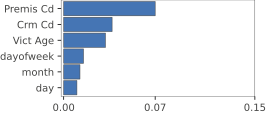

In [46]:
from rfpimp import *
I = importances(cl, X_test, y_test)
plot_importances(I, color='#4575b4', vscale=1.4)

In [47]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(n_estimators = 100)
gbr.fit(X_train, y_train)
print(f"GB Training score {gbr.score(X_train, y_train):.4f}")
print(f"GB Validation score {gbr.score(X_test, y_test):.4f}")

GB Training score 0.1295
GB Validation score 0.0809


getting a baseline 

In [48]:
#baseline model
numfeatures = ['Vict Age', 'Crm Cd', 'Premis Cd', 'dayofweek','day','month']
X, y = crime[numfeatures], crime['AREA']
rf = RandomForestClassifier(n_estimators=100, n_jobs=-1, oob_score=True)
rf.fit(X, y)
oob_baseline = rf.oob_score_
print(oob_baseline)

0.15642


In [49]:
#copying the data
crime_coded= crime.copy()

In [50]:
#!pip install category_encoders

### creating a function

In [51]:
def test(X, y):
    rf = RandomForestClassifier(oob_score=True)
    rf.fit(X, y)
    oob = rf.oob_score_
    n = rfnnodes(rf)
    h = np.median(rfmaxdepths(rf))
    print(f"OOB R^2 {oob:.5f} using {n:,d} tree nodes with {h} median tree height")
    return rf, oob

In [52]:
#target encoding
from category_encoders.target_encoder import TargetEncoder
#crime_coded = crime_coded.reset_index() # not sure why TargetEncoder needs this but it does
targetfeatures = ['Vict Descent']
encoder = TargetEncoder(cols=targetfeatures)
encoder.fit(crime_coded, crime_coded['AREA'])
df_encoded = encoder.transform(crime_coded, crime_coded['AREA'])

X, y = df_encoded[targetfeatures+numfeatures], crime_coded['AREA']
rf, oob = test(X, y)

OOB R^2 0.18462 using 10,667,914 tree nodes with 41.0 median tree height


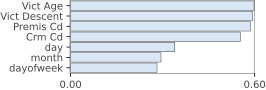

In [53]:
I = importances(rf, X, y)
plot_importances(I)

## Encoding categorical variables 

#### using one - hot encoding

In [167]:
import pandas as pd

# Use pandas get_dummies() function to perform one-hot encoding
one_hot_encoded = pd.get_dummies(crime['Vict Sex'], prefix='Vict_Sex')

# Concatenate the one-hot encoded DataFrame with the original DataFrame
crime = pd.concat([crime, one_hot_encoded], axis=1)

# Drop the original 'Vict Sex' column as it's no longer needed after encoding
crime.drop('Vict Sex', axis=1, inplace=True)

# Display the updated DataFrame
print(crime.head())

        AREA  Vict Age Vict Descent  Crm Cd  Premis Cd Status  dayofweek  day  \
635850    20        27            H     442        203     IC          0   29   
635851     1        21            H     230        108     IC          6   17   
635852    19        48            H     354        502     IC          0    3   
635853     1        39            A     440        702     IC          4    2   
635857     9        46            X     740        502     IC          2   20   

        month  Vict_Sex_F  Vict_Sex_M  Vict_Sex_X  
635850      8           1           0           0  
635851      4           0           1           0  
635852     10           1           0           0  
635853     12           1           0           0  
635857      7           0           1           0  


This code defines two functions df_string_to_cat and df_cat_to_catcode for handling categorical data in a pandas DataFrame. Here's an explanation of each function:

df_string_to_cat(df):

This function takes a pandas DataFrame df as input.
It iterates over each column in the DataFrame using for col in df.columns.
For each column, it checks if the data type is string using is_string_dtype(df[col]) from pandas.api.types.
If the data type is string, it converts it to a categorical type using astype('category').
The .cat.as_ordered() method ensures that the categories are ordered based on the order they appear in the data.
So, essentially, this function converts string columns in the DataFrame to categorical columns.
df_cat_to_catcode(df):

This function also takes a pandas DataFrame df as input.
Similar to the previous function, it iterates over each column in the DataFrame.
For each column, it checks if the data type is categorical using is_categorical_dtype(df[col]).
If the data type is categorical, it converts the categories to integer codes using .cat.codes.
The + 1 is added to ensure that the codes start from 1 instead of 0.
So, this function converts categorical columns in the DataFrame to integer codes.
Overall, these functions are useful for preprocessing categorical data in a pandas DataFrame, converting string columns to categorical type and then converting categorical type to integer codes. This can be helpful before applying machine learning algorithms that require numerical input data.

#### categorical encoding

In [168]:
crime_old = crime.copy()

crime_old.head()

,AREA,Vict Age,Vict Descent,Crm Cd,Premis Cd,Status,dayofweek,day,month,Vict_Sex_F,Vict_Sex_M,Vict_Sex_X
635850,20,27,H,442,203,IC,0,29,8,1,0,0
635851,1,21,H,230,108,IC,6,17,4,0,1,0
635852,19,48,H,354,502,IC,0,3,10,1,0,0
635853,1,39,A,440,702,IC,4,2,12,1,0,0
635857,9,46,X,740,502,IC,2,20,7,0,1,0


In [169]:
crime = crime_old.copy()

In [170]:
# from pandas.api.types import is_categorical_dtype
# from pandas.api.types import is_string_dtype

# def df_string_to_cat(df):
#     for col in df.columns:
#         if is_string_dtype(df[col]):
#             df[col] = df[col].astype('category').cat.as_ordered()

# def df_cat_to_catcode(df):
#     for col in df.columns:
#         if is_categorical_dtype(df[col]):
#             df[col] = df[col].cat.codes + 1

In [171]:
crime

,AREA,Vict Age,Vict Descent,Crm Cd,Premis Cd,Status,dayofweek,day,month,Vict_Sex_F,Vict_Sex_M,Vict_Sex_X
635850,20,27,H,442,203,IC,0,29,8,1,0,0
635851,1,21,H,230,108,IC,6,17,4,0,1,0
635852,19,48,H,354,502,IC,0,3,10,1,0,0
635853,1,39,A,440,702,IC,4,2,12,1,0,0
635857,9,46,X,740,502,IC,2,20,7,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
807371,11,47,F,745,704,IC,3,6,7,0,1,0
807372,16,23,H,740,122,IC,3,26,1,0,1,0
807373,16,25,H,230,102,IC,2,22,3,1,0,0
807375,1,24,H,352,735,IC,5,1,7,1,0,0


In [172]:
# df_string_to_cat(crime)

# df_cat_to_catcode(crime)
# crime.head(10)

In [173]:
def encode_categorical_columns(df):
    mapping_dict = {}  # Initialize an empty dictionary to store mappings
    
    for col in df.columns:
        if df[col].dtype == 'object':
            # Convert string/object columns to categorical dtype
            df[col] = df[col].astype('category').cat.as_ordered()
        
        if df[col].dtype.name == 'category':
            # Get the unique categories before encoding
            categories_before = df[col].cat.categories.tolist()
            
            # Encode the categorical column
            df[col] = df[col].cat.codes + 1
            
            # Get the unique categories after encoding
            categories_after = df[col].unique().tolist()
            
            # Store the mapping between original categories and encoded values
            mapping_dict[col] = {cat_before: cat_after for cat_before, cat_after in zip(categories_before, categories_after)}
    
    return mapping_dict


In [174]:
encode_categorical_columns(crime)

{'Vict Descent': {'A': 7,
  'B': 1,
  'C': 18,
  'D': 2,
  'F': 17,
  'G': 12,
  'H': 5,
  'I': 9,
  'J': 3,
  'K': 10,
  'L': 8,
  'O': 16,
  'P': 11,
  'S': 19,
  'U': 13,
  'V': 6,
  'W': 15,
  'X': 4,
  'Z': 14},
 'Status': {'AA': 4, 'AO': 1, 'CC': 2, 'IC': 6, 'JA': 5, 'JO': 3}}

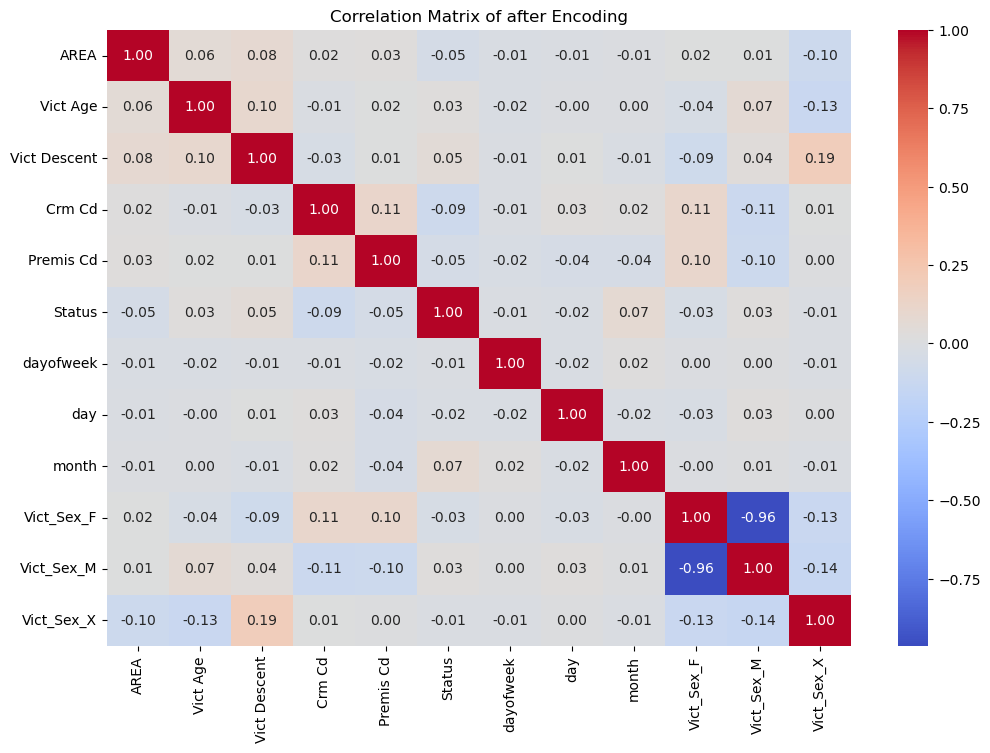

In [175]:
correlation_matrix = crime.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of after Encoding")
plt.show()

In [176]:
crime.head()

,AREA,Vict Age,Vict Descent,Crm Cd,Premis Cd,Status,dayofweek,day,month,Vict_Sex_F,Vict_Sex_M,Vict_Sex_X
635850,20,27,7,442,203,4,0,29,8,1,0,0
635851,1,21,7,230,108,4,6,17,4,0,1,0
635852,19,48,7,354,502,4,0,3,10,1,0,0
635853,1,39,1,440,702,4,4,2,12,1,0,0
635857,9,46,18,740,502,4,2,20,7,0,1,0


##### creating a model using test function

In [177]:
from sklearn.model_selection import train_test_split

X = crime.drop('AREA',axis = 1)
y = crime['AREA']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
rf, oob = test(X, y)

OOB R^2 0.18759 using 10,576,140 tree nodes with 43.0 median tree height


In [64]:
X_train

,Vict Age,Vict Descent,Crm Cd,Premis Cd,Status,dayofweek,day,month,Vict_Sex_F,Vict_Sex_M,Vict_Sex_X
807069,34,7,330,108,4,6,12,3,1,0,0
792127,22,17,230,504,1,4,4,8,0,1,0
747881,26,12,121,501,4,5,12,8,1,0,0
721666,69,7,331,101,4,6,15,1,0,1,0
800333,27,2,888,501,4,6,28,5,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
752899,34,7,624,702,4,0,13,2,0,1,0
730928,25,9,330,101,4,6,5,2,1,0,0
659159,30,17,330,707,4,5,24,6,1,0,0
701324,23,7,236,501,1,6,12,2,1,0,0


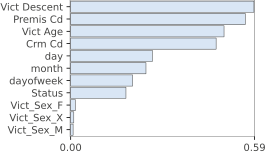

In [178]:
I = importances(rf, X, y)
plot_importances(I)

In [196]:
from sklearn.model_selection import train_test_split

X = crime.drop(['AREA','Status','day'],axis = 1)
y = crime['AREA']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)


# Model selection and training
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [197]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
# Make predictions on the test set
y_pred = rf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
f1 = f1_score(y_test, y_pred,average='weighted')
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.17685
Precision: 0.1696507874917848
Recall: 0.17685
F1 Score: 0.1715124446075365


In [198]:
# Assuming area_map is a dictionary mapping area codes to their names
area_map = {
    '03': 'Southwest',
    '01': 'Central',
    '15': 'N Hollywood',
    '19': 'Mission',
    '17': 'Devonshire',
    '11': 'Northeast',
    '05': 'Harbor',
    '09': 'Van Nuys',
    '10': 'West Valley',
    '08': 'West LA',
    '07': 'Wilshire',
    '02': 'Rampart',
    '12': '77th Street',
    '04': 'Hollenbeck',
    '18': 'Southeast',
    '14': 'Pacific',
    '13': 'Newton',
    '06': 'Hollywood',
    '16': 'Foothill',
    '20': 'Olympic',
    '21': 'Topanga'
}

# Then you can use it to map predictions to area names
next_10_prediction_names = [area_map.get(str(prediction)) for prediction in next_10_predictions]

print("Next 10 Predictions:")
for i, prediction_name in enumerate(next_10_prediction_names, 1):
    print(f"Prediction {i}: {prediction_name}")



Next 10 Predictions:
Prediction 1: Foothill
Prediction 2: None
Prediction 3: Devonshire
Prediction 4: None
Prediction 5: Olympic
Prediction 6: N Hollywood
Prediction 7: None
Prediction 8: None
Prediction 9: Foothill
Prediction 10: Mission


In [200]:
# Get the indices of the rows in X_test used for making the next 10 predictions
indices = np.where(y_pred[:20])[0]

# Get the input features for these rows
input_features = X_test.iloc[indices]

# Print the input features
print("Input Features Used for Next 10 Predictions:")
print(input_features)

Input Features Used for Next 10 Predictions:
        Vict Age  Vict Descent  Crm Cd  Premis Cd  dayofweek  month  \
757803        40             7     331        501          0      1   
766922        76             1     626        502          5      1   
712113        31             7     626        101          2      7   
655854        38             7     761        405          1      2   
735232        61            12     624        120          6      4   
686356        41            19     330        101          1      6   
734770        33            17     330        123          1      9   
799556        27             2     420        108          0      5   
666738        30             7     310        221          5      2   
680601        45             7     331        101          2      2   
788610        66            17     310        501          2      9   
702216        51             2     230        203          2      9   
773981        54            17  

In [193]:
X_test[:10]

,Vict Age,Vict Descent,Crm Cd,Premis Cd,Status,dayofweek,day,month,Vict_Sex_F,Vict_Sex_M,Vict_Sex_X
668370,25,7,230,101,4,4,23,6,1,0,0
680368,56,12,930,732,2,0,27,2,0,1,0
771456,47,17,310,501,4,2,23,8,0,1,0
649212,37,2,624,102,4,6,2,7,0,1,0
647401,31,7,310,502,4,4,7,4,1,0,0
672498,45,17,740,235,4,4,24,2,1,0,0
736767,35,17,440,502,4,3,22,6,1,0,0
741320,31,7,626,502,2,0,13,3,0,1,0
802476,56,7,745,501,4,5,10,6,1,0,0
767298,29,7,230,102,4,6,10,9,0,1,0


In [191]:
y_pred[:1]

array([16,  9, 17,  6, 20, 15,  7,  9, 16, 19], dtype=int64)

In [69]:
len(X_train)

80000

In [70]:
crime.head(10)

,AREA,Vict Age,Vict Descent,Crm Cd,Premis Cd,Status,dayofweek,day,month,Vict_Sex_F,Vict_Sex_M,Vict_Sex_X
635850,20,27,7,442,203,4,0,29,8,1,0,0
635851,1,21,7,230,108,4,6,17,4,0,1,0
635852,19,48,7,354,502,4,0,3,10,1,0,0
635853,1,39,1,440,702,4,4,2,12,1,0,0
635857,9,46,18,740,502,4,2,20,7,0,1,0
635860,19,58,7,740,122,4,6,18,12,0,1,0
635861,20,52,18,230,101,1,6,13,11,0,0,1
635862,2,22,7,354,502,4,2,2,11,1,0,0
635863,3,41,2,354,501,4,4,2,12,1,0,0
635866,3,90,17,624,501,2,6,1,5,0,1,0


In [71]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation with 5 folds
cv_scores = cross_val_score(rf, X, y, cv=5, scoring='accuracy')

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

Cross-Validation Scores: [0.18295 0.1941  0.18895 0.1926  0.1914 ]
Mean Accuracy: 0.19


In [72]:
crime['Premis Cd'].nunique()

272

In [73]:
crime['month'].nunique()

12

In [74]:
crime.head(15)

,AREA,Vict Age,Vict Descent,Crm Cd,Premis Cd,Status,dayofweek,day,month,Vict_Sex_F,Vict_Sex_M,Vict_Sex_X
635850,20,27,7,442,203,4,0,29,8,1,0,0
635851,1,21,7,230,108,4,6,17,4,0,1,0
635852,19,48,7,354,502,4,0,3,10,1,0,0
635853,1,39,1,440,702,4,4,2,12,1,0,0
635857,9,46,18,740,502,4,2,20,7,0,1,0
635860,19,58,7,740,122,4,6,18,12,0,1,0
635861,20,52,18,230,101,1,6,13,11,0,0,1
635862,2,22,7,354,502,4,2,2,11,1,0,0
635863,3,41,2,354,501,4,4,2,12,1,0,0
635866,3,90,17,624,501,2,6,1,5,0,1,0


In [75]:
crime.tail(15)

,AREA,Vict Age,Vict Descent,Crm Cd,Premis Cd,Status,dayofweek,day,month,Vict_Sex_F,Vict_Sex_M,Vict_Sex_X
807360,15,38,7,761,101,2,6,27,8,0,1,0
807361,10,37,17,310,501,4,6,2,4,0,1,0
807363,6,23,2,210,101,4,0,24,7,1,0,0
807364,8,57,7,888,502,4,2,10,5,1,0,0
807365,16,23,7,341,248,4,2,14,6,1,0,0
807366,9,44,2,624,738,4,2,20,9,0,1,0
807367,8,25,17,354,502,4,3,2,3,0,1,0
807368,11,42,17,440,101,4,3,12,1,0,1,0
807369,8,48,12,341,717,4,6,8,1,0,1,0
807370,15,25,17,662,710,4,3,25,5,0,1,0


In [76]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 635850 to 807376
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype
---  ------        --------------   -----
 0   AREA          100000 non-null  int64
 1   Vict Age      100000 non-null  int64
 2   Vict Descent  100000 non-null  int8 
 3   Crm Cd        100000 non-null  int64
 4   Premis Cd     100000 non-null  int64
 5   Status        100000 non-null  int8 
 6   dayofweek     100000 non-null  int64
 7   day           100000 non-null  int64
 8   month         100000 non-null  int64
 9   Vict_Sex_F    100000 non-null  uint8
 10  Vict_Sex_M    100000 non-null  uint8
 11  Vict_Sex_X    100000 non-null  uint8
dtypes: int64(7), int8(2), uint8(3)
memory usage: 6.6 MB


In [77]:
newone=crime.copy()

In [78]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Assuming 'crime' is your DataFrame
X = newone[['Vict Age', 'Vict Descent', 'Crm Cd', 'Premis Cd', 'dayofweek', 'month', 'Vict_Sex_F', 'Vict_Sex_M', 'Vict_Sex_X']]
y = newone['AREA']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression
log_reg_model = LogisticRegression()
log_reg_model.fit(X_train_scaled, y_train)
log_reg_pred = log_reg_model.predict(X_test_scaled)
log_reg_accuracy = accuracy_score(y_test, log_reg_pred)

print("Logistic Regression Accuracy:", log_reg_accuracy)

# Support Vector Machines
svm_model = SVC()
svm_model.fit(X_train_scaled, y_train)
svm_pred = svm_model.predict(X_test_scaled)
svm_accuracy = accuracy_score(y_test, svm_pred)

print("SVM Accuracy:", svm_accuracy)

# k-Nearest Neighbors
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_scaled, y_train)
knn_pred = knn_model.predict(X_test_scaled)
knn_accuracy = accuracy_score(y_test, knn_pred)

print("k-NN Accuracy:", knn_accuracy)


Logistic Regression Accuracy: 0.12945
SVM Accuracy: 0.1459


C:\Users\macj3\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


k-NN Accuracy: 0.125
